In [1]:
#Tensorflow 설치하기

# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [2]:
#라이브러리 불러오기

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [7]:
test.head()

,id,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [6]:
submission.head()

,id,label
0,0,malicious
1,1,benign
2,2,benign
3,3,benign
4,4,benign


In [8]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

## train

In [12]:
train['label_binary'] = train['label'].apply(lambda x : 0 if x == 'benign' else 1)

In [13]:
train = train.drop_duplicates(subset = list(df.columns), keep='first')
train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,benign,0
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign,0
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign,0


In [14]:
train.dropna(inplace=True)

In [16]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [18]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

In [19]:
result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.384489
url_domain_len             0.380448
url_num_hyphens_dom        0.355480
url_query_len              0.189689
url_num_query_para         0.184497
url_entropy                0.162198
html_num_tags('form')      0.116354
html_num_tags('body')      0.110581
html_num_tags('head')      0.012990
url_len                   -0.006429
url_port                  -0.006642
html_num_tags('iframe')   -0.033966
url_num_dots              -0.047256
html_num_tags('div')      -0.061183
url_ip_present            -0.076236
html_num_tags('object')   -0.105710
html_num_tags('embed')    -0.111295
url_path_len              -0.113835
html_num_tags('a')        -0.113966
url_num_underscores       -0.133808
html_num_tags('script')   -0.202309
url_chinese_present             NaN
html_num_tags('applet')         NaN
label_binary                    NaN
Name: label_binary, dtype: float64

In [20]:
col_name = list(result.loc['label_binary'].sort_values(ascending = False)[8:15].index)
col_name.append("html_num_tags('applet')")
col_name.append("url_chinese_present")
print(col_name)

["html_num_tags('head')", 'url_len', 'url_port', "html_num_tags('iframe')", 'url_num_dots', "html_num_tags('div')", 'url_ip_present', "html_num_tags('applet')", 'url_chinese_present']


In [21]:
train.drop(col_name, axis=1, inplace=True)

In [23]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.384489
url_domain_len             0.380448
url_num_hyphens_dom        0.355480
url_query_len              0.189689
url_num_query_para         0.184497
url_entropy                0.162198
html_num_tags('form')      0.116354
html_num_tags('body')      0.110581
html_num_tags('object')   -0.105710
html_num_tags('embed')    -0.111295
url_path_len              -0.113835
html_num_tags('a')        -0.113966
url_num_underscores       -0.133808
html_num_tags('script')   -0.202309
label_binary                    NaN
Name: label_binary, dtype: float64

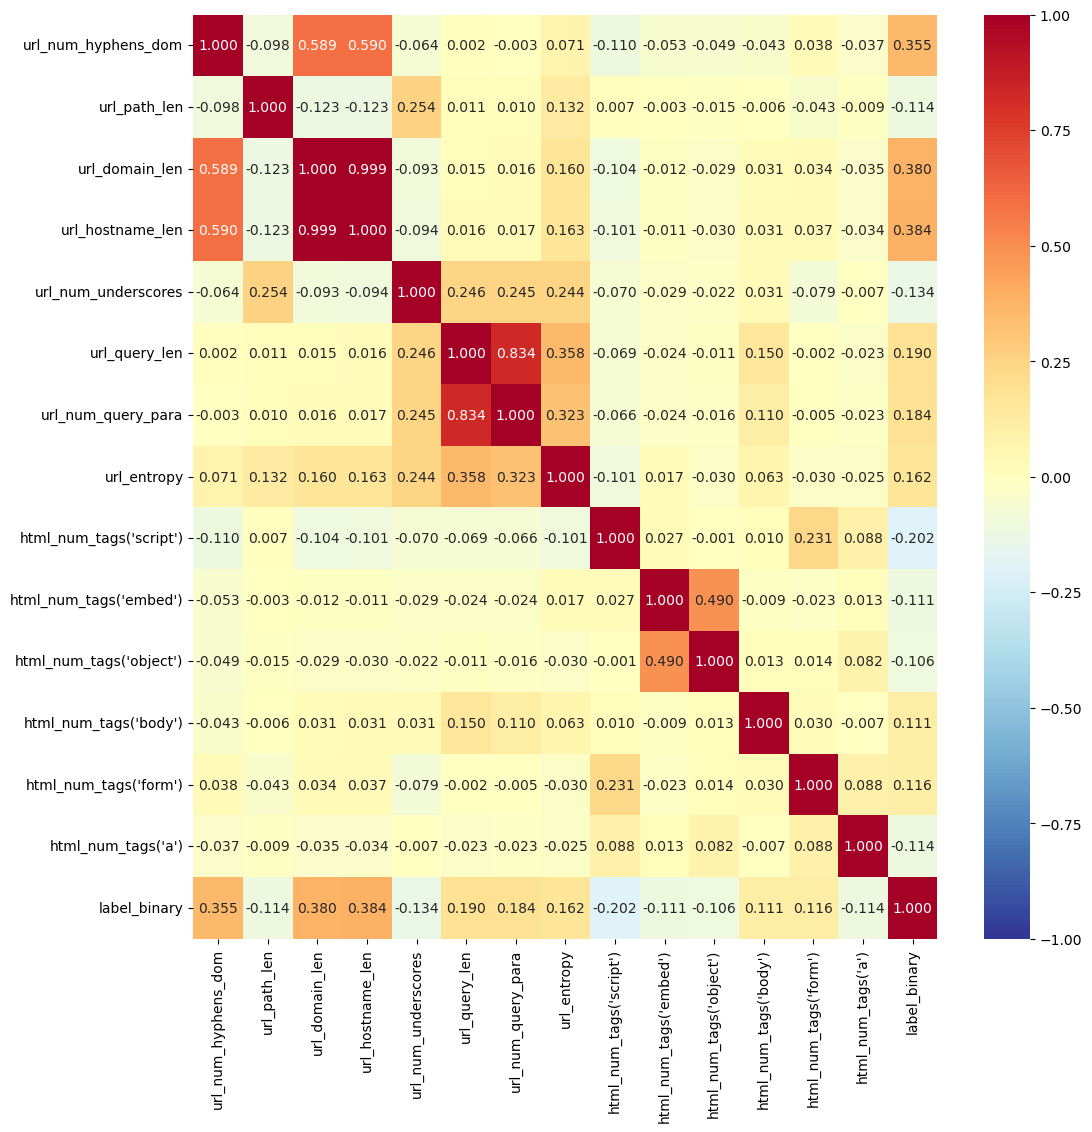

In [28]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

url_query_len = url_num_query_para          
url_domain_len = url_hostname_len              
url_len = url_path_len

In [43]:
train.url_num_hyphens_dom.unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 14.])

In [66]:
train.url_num_hyphens_dom.value_counts()

0.0     2402
1.0      448
2.0      283
3.0       66
4.0       23
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64

In [44]:
train.url_num_underscores.unique()

array([ 0.,  1.,  2.,  3., 11., 12.,  4., 10.,  5.,  6., 14., 18., 15.])

In [45]:
train.url_query_len.unique()

array([  0.,  21.,  41.,  36.,  45.,  71.,  11.,  27., 157.,  62., 124.,
        48., 132., 289.,  59.,  70.,  28.,  47., 165.,  44.,  35.,  20.,
        53.,  90., 140., 141.,  51.,   9.,  16., 114.,   5.,  55., 125.,
        13.,  31.,  34., 106., 162., 145.,  98.,  15., 110., 144., 200.,
        37.,  52., 271.,  49., 122., 312.,  42.,  85.,  18., 146., 350.,
        82., 102., 429.,   6.,  57.,  40.,  68.,  94., 173., 208.,  19.,
       185., 248.,  17.,  64.,  56.,  25.,  30.,  81., 156., 111., 120.,
        43.])

In [46]:
train.url_num_query_para.unique()

array([0., 1., 2., 3., 6., 7., 4., 9., 8.])

In [65]:
train.url_num_query_para.value_counts()

0.0    3053
1.0      98
2.0      35
3.0      31
6.0       5
7.0       4
9.0       2
8.0       2
4.0       1
Name: url_num_query_para, dtype: int64

In [48]:
train["html_num_tags('script')"].unique()

array([  7.,  18.,  33.,  15.,  10.,   4.,   8.,  22.,  17.,   3.,  36.,
        13.,   0.,   2.,  12.,   5.,  24.,  16.,   1.,   6.,  21.,  14.,
        28.,  11.,  42.,  35.,   9.,  43.,  25.,  27., 104.,  23., 108.,
        19.,  53.,  31.,  46.,  26.,  37.,  78.,  29.,  77.,  47.,  87.,
        83.,  38.,  50.,  49.,  20.,  44.,  32.,  45.,  48.,  61.,  39.,
        40.,  30.,  56.,  74.,  34.,  60.,  97., 267.,  41.,  52., 140.,
        65.,  51.,  90.,  98.,  70.,  54.,  69., 129.,  59.,  82., 174.,
        63.])

In [49]:
train["html_num_tags('embed')"].unique()

array([0., 1., 3.])

In [61]:
train["html_num_tags('embed')"].value_counts()

0.0    3173
1.0      56
3.0       2
Name: html_num_tags('embed'), dtype: int64

In [50]:
train["html_num_tags('object')"].unique()

array([0., 1., 2., 3., 8., 4., 5.])

In [62]:
train["html_num_tags('object')"].value_counts()

0.0    3153
1.0      69
2.0       5
3.0       1
8.0       1
4.0       1
5.0       1
Name: html_num_tags('object'), dtype: int64

In [64]:
train["html_num_tags('body')"].unique()

array([1., 2., 0., 3.])

In [57]:
train["html_num_tags('form')"].unique()

array([ 0.,  3.,  1.,  2.,  5.,  9.,  4.,  7., 57., 19.,  8., 11.,  6.,
       10.])

In [70]:
#train["html_num_tags('a')"].unique()

In [72]:
#train.url_path_len.unique()

In [73]:
train.url_hostname_len.unique()

array([ 15.,  17.,  16.,  14.,  27.,  18.,  19.,  25.,  13.,  23.,  20.,
        12.,  10.,  34.,  24.,  32.,  22.,  30.,  28.,  11.,  26.,  42.,
         9.,  21.,  33.,  43.,   8.,  31.,  44.,   6.,  48.,   7.,  37.,
         4.,  68.,  29.,  36.,  40.,  46., 101.,  39.,  38.,  35.,  61.,
        47.,  45.,  52.,  72.,  55.,  56.,  57., 104.,   5.,  41.,  51.,
        74.,  60.,  49., 109.,  85., 100.,  54.,  62.,  53.,  77.,  63.,
       103.])

## test

In [79]:
train.columns

Index(['url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_underscores', 'url_query_len',
       'url_num_query_para', 'url_entropy', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'label', 'label_binary'],
      dtype='object')

In [80]:
Features_ = ['url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_underscores', 'url_query_len',
       'url_num_query_para', 'url_entropy', "html_num_tags('script')",
       "html_num_tags('embed')", "html_num_tags('object')",
       "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')"]

In [81]:
test = test[Features_]

In [82]:
test.isnull().sum()

url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_entropy                  0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
dtype: int64

In [83]:
test.url_domain_len

0       17.0
1       15.0
2       20.0
3       26.0
4       26.0
        ... 
2436    17.0
2437    35.0
2438    22.0
2439    14.0
2440    22.0
Name: url_domain_len, Length: 2441, dtype: float64

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'lightgbm'

In [38]:
test.head()

,id,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,0,0,80.0,17.0,17.0,0,0,0,4.844913,5.0,0,0,1,1.0,3.0
1,1,0,22.0,15.0,15.0,1,0,0,4.246157,NaN,0,0,1,NaN,NaN
2,2,0,NaN,20.0,20.0,3,0,0,4.612835,6.0,3,3,1,0.0,136.0
3,3,0,14.0,26.0,26.0,0,0,0,4.238521,NaN,0,0,1,1.0,2.0
4,4,2,NaN,26.0,26.0,0,0,0,4.240669,NaN,0,0,1,NaN,NaN


## 결측치 처리

결측치 처리 리스트 

url_path_len,         
url_hostname_len,             
html_num_tags('script'),            
html_num_tags('form'),                
html_num_tags('a')

In [78]:
train

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,label_binary
0,0.0,8.0,15.0,15.0,0.0,0.0,0.0,4.260333,7.0,0.0,0.0,1.0,0.0,0.0,malicious,1
1,0.0,58.0,17.0,17.0,0.0,0.0,0.0,4.636107,18.0,0.0,0.0,1.0,0.0,21.0,benign,0
2,0.0,4.0,16.0,16.0,0.0,0.0,0.0,3.708966,33.0,0.0,0.0,1.0,3.0,70.0,benign,0
3,0.0,13.0,14.0,14.0,0.0,0.0,0.0,4.025592,15.0,0.0,0.0,1.0,1.0,55.0,benign,0
4,2.0,12.0,27.0,27.0,0.0,0.0,0.0,4.631833,10.0,0.0,0.0,1.0,0.0,321.0,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,0.0,21.0,21.0,21.0,0.0,0.0,0.0,4.148415,63.0,0.0,0.0,1.0,1.0,45.0,benign,0
3658,0.0,0.0,14.0,14.0,0.0,0.0,0.0,3.499228,0.0,0.0,0.0,1.0,0.0,1.0,benign,0
3659,3.0,16.0,52.0,52.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,1.0,0.0,3.0,malicious,1
3660,0.0,48.0,18.0,18.0,0.0,0.0,0.0,4.362331,14.0,0.0,0.0,1.0,3.0,475.0,benign,0


In [84]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train[Features_])

In [86]:
temp_train = pd.DataFrame(imputed, columns=train.columns[:-2])

In [90]:
test_copy = test.copy()
#train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(temp_train)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [91]:
test.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,0.0,80.000000,17.0,17.0,0.0,0.0,0.0,4.844913,5.000000,0.0,0.0,1.0,1.0,3.000000
1,0.0,22.000000,15.0,15.0,1.0,0.0,0.0,4.246157,17.333333,0.0,0.0,1.0,1.0,136.666667
2,0.0,57.333333,20.0,20.0,3.0,0.0,0.0,4.612835,6.000000,3.0,3.0,1.0,0.0,136.000000
3,0.0,14.000000,26.0,26.0,0.0,0.0,0.0,4.238521,4.333333,0.0,0.0,1.0,1.0,2.000000
4,2.0,10.000000,26.0,26.0,0.0,0.0,0.0,4.240669,2.000000,0.0,0.0,1.0,1.0,15.666667


In [92]:
test.isnull().sum()

url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_entropy                0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
dtype: int64

## 모델링

In [94]:
!pip install catboost

     --------------------------------------- 74.0/74.0 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [95]:
from catboost import CatBoostClassifier

In [97]:
train.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,label_binary
0,0.0,8.0,15.0,15.0,0.0,0.0,0.0,4.260333,7.0,0.0,0.0,1.0,0.0,0.0,malicious,1
1,0.0,58.0,17.0,17.0,0.0,0.0,0.0,4.636107,18.0,0.0,0.0,1.0,0.0,21.0,benign,0
2,0.0,4.0,16.0,16.0,0.0,0.0,0.0,3.708966,33.0,0.0,0.0,1.0,3.0,70.0,benign,0
3,0.0,13.0,14.0,14.0,0.0,0.0,0.0,4.025592,15.0,0.0,0.0,1.0,1.0,55.0,benign,0
4,2.0,12.0,27.0,27.0,0.0,0.0,0.0,4.631833,10.0,0.0,0.0,1.0,0.0,321.0,benign,0


In [98]:
X = train.drop(['label','label_binary'], axis=1)
y = train['label_binary']

In [100]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                     subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9382 0.952  0.9396 0.9551 0.9582]
평균 검증 정확도: 0.9486


In [117]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                     subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

Learning rate set to 0.015452
0:	learn: 0.6735456	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6563267	total: 8.63ms	remaining: 4.31s
2:	learn: 0.6385677	total: 13ms	remaining: 4.31s
3:	learn: 0.6229268	total: 15.9ms	remaining: 3.95s
4:	learn: 0.6099297	total: 19.1ms	remaining: 3.81s
5:	learn: 0.5949670	total: 22.3ms	remaining: 3.69s
6:	learn: 0.5847407	total: 25.3ms	remaining: 3.59s
7:	learn: 0.5741289	total: 28.3ms	remaining: 3.5s
8:	learn: 0.5616790	total: 30.9ms	remaining: 3.4s
9:	learn: 0.5495769	total: 33.9ms	remaining: 3.35s
10:	learn: 0.5374407	total: 36.5ms	remaining: 3.28s
11:	learn: 0.5250372	total: 39.1ms	remaining: 3.22s
12:	learn: 0.5141956	total: 41.7ms	remaining: 3.17s
13:	learn: 0.5057986	total: 44.6ms	remaining: 3.14s
14:	learn: 0.4961989	total: 47.3ms	remaining: 3.1s
15:	learn: 0.4843838	total: 50.3ms	remaining: 3.09s
16:	learn: 0.4744244	total: 53.2ms	remaining: 3.07s
17:	learn: 0.4645986	total: 55.8ms	remaining: 3.04s
18:	learn: 0.4571986	total: 58.5ms	remaining: 3.0

179:	learn: 0.1887059	total: 787ms	remaining: 3.58s
180:	learn: 0.1880737	total: 795ms	remaining: 3.6s
181:	learn: 0.1876714	total: 800ms	remaining: 3.6s
182:	learn: 0.1872788	total: 806ms	remaining: 3.6s
183:	learn: 0.1869872	total: 812ms	remaining: 3.6s
184:	learn: 0.1865348	total: 817ms	remaining: 3.6s
185:	learn: 0.1861928	total: 821ms	remaining: 3.59s
186:	learn: 0.1859683	total: 827ms	remaining: 3.6s
187:	learn: 0.1857318	total: 832ms	remaining: 3.59s
188:	learn: 0.1853991	total: 837ms	remaining: 3.59s
189:	learn: 0.1849814	total: 842ms	remaining: 3.59s
190:	learn: 0.1848015	total: 847ms	remaining: 3.59s
191:	learn: 0.1843710	total: 853ms	remaining: 3.59s
192:	learn: 0.1841980	total: 859ms	remaining: 3.59s
193:	learn: 0.1840020	total: 865ms	remaining: 3.59s
194:	learn: 0.1837209	total: 871ms	remaining: 3.59s
195:	learn: 0.1833430	total: 877ms	remaining: 3.6s
196:	learn: 0.1829499	total: 881ms	remaining: 3.59s
197:	learn: 0.1824065	total: 887ms	remaining: 3.59s
198:	learn: 0.18198

352:	learn: 0.1473885	total: 1.78s	remaining: 3.26s
353:	learn: 0.1471433	total: 1.78s	remaining: 3.25s
354:	learn: 0.1470029	total: 1.79s	remaining: 3.25s
355:	learn: 0.1469228	total: 1.79s	remaining: 3.24s
356:	learn: 0.1466815	total: 1.8s	remaining: 3.24s
357:	learn: 0.1465780	total: 1.8s	remaining: 3.23s
358:	learn: 0.1465669	total: 1.81s	remaining: 3.23s
359:	learn: 0.1464187	total: 1.81s	remaining: 3.22s
360:	learn: 0.1463733	total: 1.82s	remaining: 3.22s
361:	learn: 0.1461140	total: 1.82s	remaining: 3.21s
362:	learn: 0.1459383	total: 1.83s	remaining: 3.21s
363:	learn: 0.1458786	total: 1.83s	remaining: 3.2s
364:	learn: 0.1457662	total: 1.84s	remaining: 3.2s
365:	learn: 0.1456108	total: 1.84s	remaining: 3.19s
366:	learn: 0.1455089	total: 1.85s	remaining: 3.19s
367:	learn: 0.1454986	total: 1.85s	remaining: 3.18s
368:	learn: 0.1452990	total: 1.86s	remaining: 3.18s
369:	learn: 0.1449741	total: 1.86s	remaining: 3.17s
370:	learn: 0.1447226	total: 1.87s	remaining: 3.17s
371:	learn: 0.14

532:	learn: 0.1174469	total: 2.77s	remaining: 2.43s
533:	learn: 0.1172757	total: 2.78s	remaining: 2.42s
534:	learn: 0.1172118	total: 2.78s	remaining: 2.42s
535:	learn: 0.1170562	total: 2.79s	remaining: 2.41s
536:	learn: 0.1168115	total: 2.79s	remaining: 2.41s
537:	learn: 0.1166891	total: 2.8s	remaining: 2.4s
538:	learn: 0.1166243	total: 2.81s	remaining: 2.4s
539:	learn: 0.1165601	total: 2.81s	remaining: 2.4s
540:	learn: 0.1163480	total: 2.82s	remaining: 2.39s
541:	learn: 0.1161286	total: 2.82s	remaining: 2.38s
542:	learn: 0.1160030	total: 2.83s	remaining: 2.38s
543:	learn: 0.1157970	total: 2.83s	remaining: 2.37s
544:	learn: 0.1156526	total: 2.83s	remaining: 2.37s
545:	learn: 0.1155645	total: 2.84s	remaining: 2.36s
546:	learn: 0.1153197	total: 2.85s	remaining: 2.36s
547:	learn: 0.1151046	total: 2.85s	remaining: 2.35s
548:	learn: 0.1149900	total: 2.86s	remaining: 2.35s
549:	learn: 0.1148068	total: 2.86s	remaining: 2.34s
550:	learn: 0.1145954	total: 2.87s	remaining: 2.34s
551:	learn: 0.11

705:	learn: 0.0930410	total: 3.76s	remaining: 1.56s
706:	learn: 0.0929178	total: 3.76s	remaining: 1.56s
707:	learn: 0.0927648	total: 3.77s	remaining: 1.55s
708:	learn: 0.0926669	total: 3.77s	remaining: 1.55s
709:	learn: 0.0925524	total: 3.77s	remaining: 1.54s
710:	learn: 0.0923411	total: 3.78s	remaining: 1.54s
711:	learn: 0.0922544	total: 3.78s	remaining: 1.53s
712:	learn: 0.0921596	total: 3.79s	remaining: 1.52s
713:	learn: 0.0921153	total: 3.79s	remaining: 1.52s
714:	learn: 0.0920197	total: 3.8s	remaining: 1.51s
715:	learn: 0.0919430	total: 3.8s	remaining: 1.51s
716:	learn: 0.0918503	total: 3.81s	remaining: 1.5s
717:	learn: 0.0917914	total: 3.81s	remaining: 1.5s
718:	learn: 0.0916839	total: 3.82s	remaining: 1.49s
719:	learn: 0.0915409	total: 3.82s	remaining: 1.49s
720:	learn: 0.0914218	total: 3.83s	remaining: 1.48s
721:	learn: 0.0913029	total: 3.83s	remaining: 1.48s
722:	learn: 0.0912193	total: 3.84s	remaining: 1.47s
723:	learn: 0.0910156	total: 3.84s	remaining: 1.46s
724:	learn: 0.09

881:	learn: 0.0764806	total: 4.74s	remaining: 634ms
882:	learn: 0.0763437	total: 4.75s	remaining: 629ms
883:	learn: 0.0762738	total: 4.75s	remaining: 624ms
884:	learn: 0.0761925	total: 4.76s	remaining: 618ms
885:	learn: 0.0761446	total: 4.76s	remaining: 613ms
886:	learn: 0.0760728	total: 4.77s	remaining: 608ms
887:	learn: 0.0760242	total: 4.77s	remaining: 602ms
888:	learn: 0.0759192	total: 4.78s	remaining: 597ms
889:	learn: 0.0757869	total: 4.79s	remaining: 592ms
890:	learn: 0.0757102	total: 4.79s	remaining: 586ms
891:	learn: 0.0756827	total: 4.8s	remaining: 581ms
892:	learn: 0.0756148	total: 4.8s	remaining: 575ms
893:	learn: 0.0755363	total: 4.81s	remaining: 570ms
894:	learn: 0.0754620	total: 4.81s	remaining: 564ms
895:	learn: 0.0754404	total: 4.82s	remaining: 559ms
896:	learn: 0.0753799	total: 4.82s	remaining: 554ms
897:	learn: 0.0753200	total: 4.83s	remaining: 548ms
898:	learn: 0.0752851	total: 4.83s	remaining: 543ms
899:	learn: 0.0752268	total: 4.84s	remaining: 538ms
900:	learn: 0.

75:	learn: 0.2610267	total: 447ms	remaining: 5.43s
76:	learn: 0.2589452	total: 451ms	remaining: 5.41s
77:	learn: 0.2579210	total: 458ms	remaining: 5.41s
78:	learn: 0.2566422	total: 463ms	remaining: 5.4s
79:	learn: 0.2552073	total: 468ms	remaining: 5.38s
80:	learn: 0.2533594	total: 473ms	remaining: 5.36s
81:	learn: 0.2517531	total: 477ms	remaining: 5.34s
82:	learn: 0.2503117	total: 482ms	remaining: 5.33s
83:	learn: 0.2494240	total: 487ms	remaining: 5.31s
84:	learn: 0.2480823	total: 492ms	remaining: 5.29s
85:	learn: 0.2469837	total: 497ms	remaining: 5.28s
86:	learn: 0.2461036	total: 501ms	remaining: 5.26s
87:	learn: 0.2449266	total: 506ms	remaining: 5.24s
88:	learn: 0.2432648	total: 511ms	remaining: 5.23s
89:	learn: 0.2425723	total: 516ms	remaining: 5.21s
90:	learn: 0.2417124	total: 522ms	remaining: 5.21s
91:	learn: 0.2409070	total: 527ms	remaining: 5.21s
92:	learn: 0.2398210	total: 533ms	remaining: 5.2s
93:	learn: 0.2387337	total: 538ms	remaining: 5.19s
94:	learn: 0.2380156	total: 543ms

265:	learn: 0.1705937	total: 1.64s	remaining: 4.54s
266:	learn: 0.1702571	total: 1.65s	remaining: 4.53s
267:	learn: 0.1700963	total: 1.66s	remaining: 4.52s
268:	learn: 0.1699759	total: 1.66s	remaining: 4.51s
269:	learn: 0.1698389	total: 1.66s	remaining: 4.5s
270:	learn: 0.1696606	total: 1.67s	remaining: 4.49s
271:	learn: 0.1693052	total: 1.67s	remaining: 4.48s
272:	learn: 0.1688306	total: 1.68s	remaining: 4.47s
273:	learn: 0.1683536	total: 1.68s	remaining: 4.46s
274:	learn: 0.1681244	total: 1.69s	remaining: 4.45s
275:	learn: 0.1679904	total: 1.69s	remaining: 4.44s
276:	learn: 0.1678475	total: 1.7s	remaining: 4.43s
277:	learn: 0.1675554	total: 1.7s	remaining: 4.43s
278:	learn: 0.1674384	total: 1.71s	remaining: 4.42s
279:	learn: 0.1672262	total: 1.71s	remaining: 4.41s
280:	learn: 0.1667580	total: 1.72s	remaining: 4.4s
281:	learn: 0.1665092	total: 1.73s	remaining: 4.39s
282:	learn: 0.1663011	total: 1.73s	remaining: 4.38s
283:	learn: 0.1661611	total: 1.73s	remaining: 4.37s
284:	learn: 0.16

443:	learn: 0.1384416	total: 2.63s	remaining: 3.3s
444:	learn: 0.1382664	total: 2.64s	remaining: 3.29s
445:	learn: 0.1379633	total: 2.65s	remaining: 3.29s
446:	learn: 0.1378455	total: 2.65s	remaining: 3.28s
447:	learn: 0.1377976	total: 2.66s	remaining: 3.27s
448:	learn: 0.1376642	total: 2.66s	remaining: 3.27s
449:	learn: 0.1375927	total: 2.67s	remaining: 3.26s
450:	learn: 0.1373574	total: 2.67s	remaining: 3.25s
451:	learn: 0.1372414	total: 2.68s	remaining: 3.25s
452:	learn: 0.1370833	total: 2.68s	remaining: 3.24s
453:	learn: 0.1369843	total: 2.69s	remaining: 3.23s
454:	learn: 0.1367727	total: 2.69s	remaining: 3.23s
455:	learn: 0.1366601	total: 2.7s	remaining: 3.22s
456:	learn: 0.1364727	total: 2.71s	remaining: 3.21s
457:	learn: 0.1364369	total: 2.71s	remaining: 3.21s
458:	learn: 0.1363538	total: 2.72s	remaining: 3.2s
459:	learn: 0.1361182	total: 2.72s	remaining: 3.2s
460:	learn: 0.1359625	total: 2.73s	remaining: 3.19s
461:	learn: 0.1358555	total: 2.73s	remaining: 3.19s
462:	learn: 0.13

610:	learn: 0.1132633	total: 3.62s	remaining: 2.3s
611:	learn: 0.1132048	total: 3.62s	remaining: 2.3s
612:	learn: 0.1130229	total: 3.63s	remaining: 2.29s
613:	learn: 0.1128714	total: 3.64s	remaining: 2.29s
614:	learn: 0.1127309	total: 3.64s	remaining: 2.28s
615:	learn: 0.1125912	total: 3.65s	remaining: 2.27s
616:	learn: 0.1124521	total: 3.65s	remaining: 2.27s
617:	learn: 0.1123488	total: 3.66s	remaining: 2.26s
618:	learn: 0.1122267	total: 3.66s	remaining: 2.25s
619:	learn: 0.1120255	total: 3.67s	remaining: 2.25s
620:	learn: 0.1119017	total: 3.67s	remaining: 2.24s
621:	learn: 0.1117872	total: 3.68s	remaining: 2.24s
622:	learn: 0.1116827	total: 3.69s	remaining: 2.23s
623:	learn: 0.1116113	total: 3.69s	remaining: 2.22s
624:	learn: 0.1115228	total: 3.7s	remaining: 2.22s
625:	learn: 0.1113341	total: 3.7s	remaining: 2.21s
626:	learn: 0.1111952	total: 3.71s	remaining: 2.21s
627:	learn: 0.1110983	total: 3.71s	remaining: 2.2s
628:	learn: 0.1109727	total: 3.72s	remaining: 2.19s
629:	learn: 0.110

778:	learn: 0.0942062	total: 4.6s	remaining: 1.3s
779:	learn: 0.0940984	total: 4.61s	remaining: 1.3s
780:	learn: 0.0939186	total: 4.61s	remaining: 1.29s
781:	learn: 0.0938533	total: 4.62s	remaining: 1.29s
782:	learn: 0.0938291	total: 4.63s	remaining: 1.28s
783:	learn: 0.0937397	total: 4.63s	remaining: 1.28s
784:	learn: 0.0936657	total: 4.64s	remaining: 1.27s
785:	learn: 0.0935945	total: 4.65s	remaining: 1.26s
786:	learn: 0.0935105	total: 4.65s	remaining: 1.26s
787:	learn: 0.0934156	total: 4.66s	remaining: 1.25s
788:	learn: 0.0932284	total: 4.67s	remaining: 1.25s
789:	learn: 0.0931850	total: 4.67s	remaining: 1.24s
790:	learn: 0.0930655	total: 4.68s	remaining: 1.24s
791:	learn: 0.0929743	total: 4.68s	remaining: 1.23s
792:	learn: 0.0928326	total: 4.69s	remaining: 1.22s
793:	learn: 0.0927158	total: 4.7s	remaining: 1.22s
794:	learn: 0.0926514	total: 4.7s	remaining: 1.21s
795:	learn: 0.0925820	total: 4.71s	remaining: 1.21s
796:	learn: 0.0925385	total: 4.71s	remaining: 1.2s
797:	learn: 0.0924

957:	learn: 0.0798464	total: 5.58s	remaining: 245ms
958:	learn: 0.0797718	total: 5.59s	remaining: 239ms
959:	learn: 0.0797465	total: 5.59s	remaining: 233ms
960:	learn: 0.0796941	total: 5.6s	remaining: 227ms
961:	learn: 0.0796714	total: 5.6s	remaining: 221ms
962:	learn: 0.0796113	total: 5.61s	remaining: 216ms
963:	learn: 0.0795871	total: 5.61s	remaining: 210ms
964:	learn: 0.0794899	total: 5.62s	remaining: 204ms
965:	learn: 0.0793565	total: 5.63s	remaining: 198ms
966:	learn: 0.0792843	total: 5.63s	remaining: 192ms
967:	learn: 0.0791980	total: 5.64s	remaining: 186ms
968:	learn: 0.0791627	total: 5.64s	remaining: 181ms
969:	learn: 0.0791336	total: 5.65s	remaining: 175ms
970:	learn: 0.0791187	total: 5.65s	remaining: 169ms
971:	learn: 0.0790420	total: 5.66s	remaining: 163ms
972:	learn: 0.0789550	total: 5.66s	remaining: 157ms
973:	learn: 0.0789332	total: 5.67s	remaining: 151ms
974:	learn: 0.0788810	total: 5.67s	remaining: 145ms
975:	learn: 0.0788582	total: 5.68s	remaining: 140ms
976:	learn: 0.

118:	learn: 0.2129801	total: 723ms	remaining: 5.35s
119:	learn: 0.2127091	total: 729ms	remaining: 5.34s
120:	learn: 0.2119304	total: 735ms	remaining: 5.34s
121:	learn: 0.2115911	total: 740ms	remaining: 5.33s
122:	learn: 0.2112454	total: 745ms	remaining: 5.32s
123:	learn: 0.2106476	total: 750ms	remaining: 5.3s
124:	learn: 0.2102506	total: 755ms	remaining: 5.29s
125:	learn: 0.2094068	total: 760ms	remaining: 5.27s
126:	learn: 0.2087540	total: 765ms	remaining: 5.26s
127:	learn: 0.2084637	total: 770ms	remaining: 5.25s
128:	learn: 0.2078899	total: 775ms	remaining: 5.23s
129:	learn: 0.2074250	total: 780ms	remaining: 5.22s
130:	learn: 0.2066717	total: 785ms	remaining: 5.21s
131:	learn: 0.2061490	total: 791ms	remaining: 5.2s
132:	learn: 0.2055427	total: 795ms	remaining: 5.18s
133:	learn: 0.2051901	total: 800ms	remaining: 5.17s
134:	learn: 0.2048373	total: 805ms	remaining: 5.16s
135:	learn: 0.2043451	total: 810ms	remaining: 5.14s
136:	learn: 0.2042167	total: 815ms	remaining: 5.13s
137:	learn: 0.

288:	learn: 0.1604040	total: 1.71s	remaining: 4.21s
289:	learn: 0.1603117	total: 1.72s	remaining: 4.21s
290:	learn: 0.1600766	total: 1.73s	remaining: 4.21s
291:	learn: 0.1597326	total: 1.73s	remaining: 4.21s
292:	learn: 0.1596512	total: 1.74s	remaining: 4.2s
293:	learn: 0.1595985	total: 1.75s	remaining: 4.2s
294:	learn: 0.1594474	total: 1.75s	remaining: 4.19s
295:	learn: 0.1592913	total: 1.76s	remaining: 4.19s
296:	learn: 0.1591377	total: 1.77s	remaining: 4.19s
297:	learn: 0.1591003	total: 1.77s	remaining: 4.18s
298:	learn: 0.1586611	total: 1.78s	remaining: 4.18s
299:	learn: 0.1584900	total: 1.79s	remaining: 4.17s
300:	learn: 0.1584121	total: 1.8s	remaining: 4.17s
301:	learn: 0.1580516	total: 1.8s	remaining: 4.17s
302:	learn: 0.1579619	total: 1.81s	remaining: 4.17s
303:	learn: 0.1576775	total: 1.82s	remaining: 4.16s
304:	learn: 0.1574598	total: 1.82s	remaining: 4.16s
305:	learn: 0.1573046	total: 1.83s	remaining: 4.15s
306:	learn: 0.1572045	total: 1.84s	remaining: 4.15s
307:	learn: 0.15

452:	learn: 0.1339212	total: 2.69s	remaining: 3.25s
453:	learn: 0.1338673	total: 2.7s	remaining: 3.24s
454:	learn: 0.1337706	total: 2.7s	remaining: 3.24s
455:	learn: 0.1335786	total: 2.71s	remaining: 3.23s
456:	learn: 0.1334230	total: 2.71s	remaining: 3.23s
457:	learn: 0.1332999	total: 2.72s	remaining: 3.22s
458:	learn: 0.1332447	total: 2.73s	remaining: 3.21s
459:	learn: 0.1330544	total: 2.73s	remaining: 3.21s
460:	learn: 0.1328325	total: 2.74s	remaining: 3.21s
461:	learn: 0.1326891	total: 2.75s	remaining: 3.2s
462:	learn: 0.1324979	total: 2.75s	remaining: 3.19s
463:	learn: 0.1323352	total: 2.76s	remaining: 3.19s
464:	learn: 0.1322724	total: 2.77s	remaining: 3.19s
465:	learn: 0.1321188	total: 2.78s	remaining: 3.18s
466:	learn: 0.1319042	total: 2.78s	remaining: 3.18s
467:	learn: 0.1318107	total: 2.79s	remaining: 3.17s
468:	learn: 0.1317246	total: 2.8s	remaining: 3.17s
469:	learn: 0.1315855	total: 2.8s	remaining: 3.16s
470:	learn: 0.1312599	total: 2.81s	remaining: 3.16s
471:	learn: 0.131

637:	learn: 0.1046577	total: 3.67s	remaining: 2.08s
638:	learn: 0.1045135	total: 3.68s	remaining: 2.08s
639:	learn: 0.1044106	total: 3.69s	remaining: 2.07s
640:	learn: 0.1044023	total: 3.69s	remaining: 2.07s
641:	learn: 0.1043710	total: 3.69s	remaining: 2.06s
642:	learn: 0.1041119	total: 3.7s	remaining: 2.05s
643:	learn: 0.1040045	total: 3.71s	remaining: 2.05s
644:	learn: 0.1038467	total: 3.71s	remaining: 2.04s
645:	learn: 0.1037042	total: 3.72s	remaining: 2.04s
646:	learn: 0.1036642	total: 3.72s	remaining: 2.03s
647:	learn: 0.1035183	total: 3.73s	remaining: 2.03s
648:	learn: 0.1034773	total: 3.73s	remaining: 2.02s
649:	learn: 0.1033451	total: 3.74s	remaining: 2.01s
650:	learn: 0.1032485	total: 3.75s	remaining: 2.01s
651:	learn: 0.1032062	total: 3.75s	remaining: 2s
652:	learn: 0.1030679	total: 3.75s	remaining: 2s
653:	learn: 0.1029522	total: 3.76s	remaining: 1.99s
654:	learn: 0.1028455	total: 3.77s	remaining: 1.98s
655:	learn: 0.1026832	total: 3.77s	remaining: 1.98s
656:	learn: 0.10251

821:	learn: 0.0855888	total: 4.65s	remaining: 1.01s
822:	learn: 0.0854355	total: 4.66s	remaining: 1s
823:	learn: 0.0852501	total: 4.66s	remaining: 996ms
824:	learn: 0.0850830	total: 4.67s	remaining: 990ms
825:	learn: 0.0849988	total: 4.67s	remaining: 985ms
826:	learn: 0.0848880	total: 4.68s	remaining: 979ms
827:	learn: 0.0848558	total: 4.68s	remaining: 973ms
828:	learn: 0.0847738	total: 4.69s	remaining: 967ms
829:	learn: 0.0847138	total: 4.7s	remaining: 962ms
830:	learn: 0.0846821	total: 4.7s	remaining: 956ms
831:	learn: 0.0845779	total: 4.71s	remaining: 950ms
832:	learn: 0.0844941	total: 4.71s	remaining: 944ms
833:	learn: 0.0844092	total: 4.71s	remaining: 939ms
834:	learn: 0.0843191	total: 4.72s	remaining: 933ms
835:	learn: 0.0842403	total: 4.72s	remaining: 927ms
836:	learn: 0.0842063	total: 4.73s	remaining: 921ms
837:	learn: 0.0841092	total: 4.74s	remaining: 916ms
838:	learn: 0.0840628	total: 4.74s	remaining: 910ms
839:	learn: 0.0839758	total: 4.75s	remaining: 904ms
840:	learn: 0.083

Learning rate set to 0.015454
0:	learn: 0.6743051	total: 7.11ms	remaining: 7.1s
1:	learn: 0.6588956	total: 14.6ms	remaining: 7.27s
2:	learn: 0.6417378	total: 22ms	remaining: 7.32s
3:	learn: 0.6266481	total: 28.6ms	remaining: 7.11s
4:	learn: 0.6144658	total: 35ms	remaining: 6.97s
5:	learn: 0.5999984	total: 42ms	remaining: 6.96s
6:	learn: 0.5892958	total: 47.1ms	remaining: 6.68s
7:	learn: 0.5761335	total: 53.2ms	remaining: 6.59s
8:	learn: 0.5616412	total: 58.8ms	remaining: 6.48s
9:	learn: 0.5502878	total: 65.2ms	remaining: 6.45s
10:	learn: 0.5382346	total: 72.4ms	remaining: 6.51s
11:	learn: 0.5289531	total: 77.8ms	remaining: 6.41s
12:	learn: 0.5191653	total: 84.5ms	remaining: 6.42s
13:	learn: 0.5071281	total: 92.6ms	remaining: 6.52s
14:	learn: 0.4960509	total: 101ms	remaining: 6.62s
15:	learn: 0.4852951	total: 109ms	remaining: 6.73s
16:	learn: 0.4774765	total: 116ms	remaining: 6.7s
17:	learn: 0.4673539	total: 122ms	remaining: 6.64s
18:	learn: 0.4612571	total: 130ms	remaining: 6.7s
19:	le

179:	learn: 0.1973025	total: 1.19s	remaining: 5.41s
180:	learn: 0.1970264	total: 1.2s	remaining: 5.41s
181:	learn: 0.1963710	total: 1.2s	remaining: 5.41s
182:	learn: 0.1960053	total: 1.21s	remaining: 5.41s
183:	learn: 0.1955524	total: 1.22s	remaining: 5.4s
184:	learn: 0.1951727	total: 1.22s	remaining: 5.39s
185:	learn: 0.1949546	total: 1.23s	remaining: 5.38s
186:	learn: 0.1947582	total: 1.24s	remaining: 5.38s
187:	learn: 0.1944174	total: 1.24s	remaining: 5.36s
188:	learn: 0.1940600	total: 1.25s	remaining: 5.36s
189:	learn: 0.1935324	total: 1.25s	remaining: 5.34s
190:	learn: 0.1933345	total: 1.26s	remaining: 5.33s
191:	learn: 0.1929319	total: 1.26s	remaining: 5.32s
192:	learn: 0.1922400	total: 1.27s	remaining: 5.31s
193:	learn: 0.1920053	total: 1.27s	remaining: 5.3s
194:	learn: 0.1918375	total: 1.28s	remaining: 5.29s
195:	learn: 0.1914513	total: 1.29s	remaining: 5.28s
196:	learn: 0.1912420	total: 1.29s	remaining: 5.26s
197:	learn: 0.1908770	total: 1.3s	remaining: 5.25s
198:	learn: 0.190

344:	learn: 0.1586455	total: 2.18s	remaining: 4.14s
345:	learn: 0.1585218	total: 2.19s	remaining: 4.14s
346:	learn: 0.1582875	total: 2.19s	remaining: 4.13s
347:	learn: 0.1579318	total: 2.2s	remaining: 4.13s
348:	learn: 0.1578029	total: 2.21s	remaining: 4.12s
349:	learn: 0.1575360	total: 2.22s	remaining: 4.12s
350:	learn: 0.1572376	total: 2.22s	remaining: 4.11s
351:	learn: 0.1569955	total: 2.23s	remaining: 4.11s
352:	learn: 0.1569530	total: 2.24s	remaining: 4.1s
353:	learn: 0.1568374	total: 2.24s	remaining: 4.09s
354:	learn: 0.1567398	total: 2.25s	remaining: 4.08s
355:	learn: 0.1565938	total: 2.25s	remaining: 4.08s
356:	learn: 0.1565528	total: 2.26s	remaining: 4.07s
357:	learn: 0.1564391	total: 2.27s	remaining: 4.06s
358:	learn: 0.1559460	total: 2.27s	remaining: 4.05s
359:	learn: 0.1558659	total: 2.28s	remaining: 4.05s
360:	learn: 0.1557506	total: 2.28s	remaining: 4.04s
361:	learn: 0.1556583	total: 2.29s	remaining: 4.03s
362:	learn: 0.1553962	total: 2.29s	remaining: 4.02s
363:	learn: 0.

530:	learn: 0.1293995	total: 3.36s	remaining: 2.96s
531:	learn: 0.1291444	total: 3.36s	remaining: 2.96s
532:	learn: 0.1290815	total: 3.37s	remaining: 2.95s
533:	learn: 0.1289208	total: 3.38s	remaining: 2.95s
534:	learn: 0.1286068	total: 3.38s	remaining: 2.94s
535:	learn: 0.1285088	total: 3.39s	remaining: 2.94s
536:	learn: 0.1282863	total: 3.4s	remaining: 2.93s
537:	learn: 0.1282300	total: 3.4s	remaining: 2.92s
538:	learn: 0.1281165	total: 3.41s	remaining: 2.91s
539:	learn: 0.1279902	total: 3.41s	remaining: 2.91s
540:	learn: 0.1279324	total: 3.42s	remaining: 2.9s
541:	learn: 0.1278747	total: 3.42s	remaining: 2.89s
542:	learn: 0.1276549	total: 3.43s	remaining: 2.88s
543:	learn: 0.1275038	total: 3.43s	remaining: 2.88s
544:	learn: 0.1272373	total: 3.44s	remaining: 2.87s
545:	learn: 0.1268797	total: 3.44s	remaining: 2.86s
546:	learn: 0.1266787	total: 3.45s	remaining: 2.85s
547:	learn: 0.1264392	total: 3.45s	remaining: 2.85s
548:	learn: 0.1263104	total: 3.46s	remaining: 2.84s
549:	learn: 0.1

695:	learn: 0.1056028	total: 4.34s	remaining: 1.89s
696:	learn: 0.1055020	total: 4.35s	remaining: 1.89s
697:	learn: 0.1054025	total: 4.35s	remaining: 1.88s
698:	learn: 0.1053007	total: 4.36s	remaining: 1.88s
699:	learn: 0.1052257	total: 4.37s	remaining: 1.87s
700:	learn: 0.1050398	total: 4.38s	remaining: 1.87s
701:	learn: 0.1049859	total: 4.38s	remaining: 1.86s
702:	learn: 0.1049167	total: 4.39s	remaining: 1.85s
703:	learn: 0.1047691	total: 4.4s	remaining: 1.85s
704:	learn: 0.1047026	total: 4.41s	remaining: 1.84s
705:	learn: 0.1045983	total: 4.41s	remaining: 1.84s
706:	learn: 0.1045292	total: 4.42s	remaining: 1.83s
707:	learn: 0.1043232	total: 4.42s	remaining: 1.82s
708:	learn: 0.1042261	total: 4.43s	remaining: 1.82s
709:	learn: 0.1041442	total: 4.43s	remaining: 1.81s
710:	learn: 0.1041205	total: 4.44s	remaining: 1.8s
711:	learn: 0.1040228	total: 4.45s	remaining: 1.8s
712:	learn: 0.1039249	total: 4.45s	remaining: 1.79s
713:	learn: 0.1038604	total: 4.46s	remaining: 1.78s
714:	learn: 0.1

863:	learn: 0.0906520	total: 5.33s	remaining: 839ms
864:	learn: 0.0905786	total: 5.33s	remaining: 833ms
865:	learn: 0.0905442	total: 5.34s	remaining: 827ms
866:	learn: 0.0905300	total: 5.35s	remaining: 820ms
867:	learn: 0.0904123	total: 5.36s	remaining: 814ms
868:	learn: 0.0903142	total: 5.36s	remaining: 808ms
869:	learn: 0.0902394	total: 5.37s	remaining: 802ms
870:	learn: 0.0901685	total: 5.38s	remaining: 796ms
871:	learn: 0.0901630	total: 5.38s	remaining: 790ms
872:	learn: 0.0900682	total: 5.39s	remaining: 784ms
873:	learn: 0.0899588	total: 5.39s	remaining: 777ms
874:	learn: 0.0899565	total: 5.4s	remaining: 771ms
875:	learn: 0.0898733	total: 5.4s	remaining: 765ms
876:	learn: 0.0897865	total: 5.41s	remaining: 759ms
877:	learn: 0.0896250	total: 5.41s	remaining: 752ms
878:	learn: 0.0895205	total: 5.42s	remaining: 746ms
879:	learn: 0.0894748	total: 5.42s	remaining: 740ms
880:	learn: 0.0894445	total: 5.43s	remaining: 734ms
881:	learn: 0.0894306	total: 5.44s	remaining: 727ms
882:	learn: 0.

39:	learn: 0.3430289	total: 290ms	remaining: 6.95s
40:	learn: 0.3384162	total: 297ms	remaining: 6.94s
41:	learn: 0.3348873	total: 305ms	remaining: 6.97s
42:	learn: 0.3316633	total: 314ms	remaining: 6.98s
43:	learn: 0.3287463	total: 322ms	remaining: 7s
44:	learn: 0.3255133	total: 329ms	remaining: 6.98s
45:	learn: 0.3226916	total: 336ms	remaining: 6.97s
46:	learn: 0.3199845	total: 342ms	remaining: 6.94s
47:	learn: 0.3165985	total: 348ms	remaining: 6.89s
48:	learn: 0.3145747	total: 353ms	remaining: 6.86s
49:	learn: 0.3128015	total: 360ms	remaining: 6.84s
50:	learn: 0.3111362	total: 367ms	remaining: 6.83s
51:	learn: 0.3081834	total: 374ms	remaining: 6.82s
52:	learn: 0.3059725	total: 380ms	remaining: 6.79s
53:	learn: 0.3035371	total: 386ms	remaining: 6.77s
54:	learn: 0.3014374	total: 392ms	remaining: 6.73s
55:	learn: 0.2990402	total: 397ms	remaining: 6.7s
56:	learn: 0.2965106	total: 404ms	remaining: 6.68s
57:	learn: 0.2949032	total: 409ms	remaining: 6.65s
58:	learn: 0.2928861	total: 416ms	r

215:	learn: 0.1836616	total: 1.5s	remaining: 5.43s
216:	learn: 0.1834456	total: 1.5s	remaining: 5.42s
217:	learn: 0.1833496	total: 1.51s	remaining: 5.41s
218:	learn: 0.1830564	total: 1.51s	remaining: 5.41s
219:	learn: 0.1829297	total: 1.52s	remaining: 5.4s
220:	learn: 0.1826247	total: 1.53s	remaining: 5.39s
221:	learn: 0.1822270	total: 1.53s	remaining: 5.38s
222:	learn: 0.1818647	total: 1.54s	remaining: 5.37s
223:	learn: 0.1817289	total: 1.55s	remaining: 5.37s
224:	learn: 0.1812861	total: 1.55s	remaining: 5.36s
225:	learn: 0.1811675	total: 1.56s	remaining: 5.35s
226:	learn: 0.1809560	total: 1.57s	remaining: 5.34s
227:	learn: 0.1807228	total: 1.57s	remaining: 5.33s
228:	learn: 0.1803515	total: 1.58s	remaining: 5.33s
229:	learn: 0.1800862	total: 1.59s	remaining: 5.33s
230:	learn: 0.1797548	total: 1.6s	remaining: 5.33s
231:	learn: 0.1795457	total: 1.6s	remaining: 5.32s
232:	learn: 0.1792000	total: 1.61s	remaining: 5.31s
233:	learn: 0.1790421	total: 1.62s	remaining: 5.3s
234:	learn: 0.1789

389:	learn: 0.1513487	total: 2.49s	remaining: 3.89s
390:	learn: 0.1512687	total: 2.49s	remaining: 3.89s
391:	learn: 0.1511494	total: 2.5s	remaining: 3.88s
392:	learn: 0.1507778	total: 2.5s	remaining: 3.87s
393:	learn: 0.1506484	total: 2.51s	remaining: 3.86s
394:	learn: 0.1504288	total: 2.52s	remaining: 3.85s
395:	learn: 0.1501656	total: 2.52s	remaining: 3.84s
396:	learn: 0.1499148	total: 2.52s	remaining: 3.83s
397:	learn: 0.1497712	total: 2.53s	remaining: 3.83s
398:	learn: 0.1495244	total: 2.54s	remaining: 3.82s
399:	learn: 0.1494075	total: 2.54s	remaining: 3.81s
400:	learn: 0.1491677	total: 2.55s	remaining: 3.81s
401:	learn: 0.1488834	total: 2.55s	remaining: 3.8s
402:	learn: 0.1486738	total: 2.56s	remaining: 3.79s
403:	learn: 0.1485606	total: 2.57s	remaining: 3.79s
404:	learn: 0.1483470	total: 2.57s	remaining: 3.78s
405:	learn: 0.1481447	total: 2.58s	remaining: 3.77s
406:	learn: 0.1479799	total: 2.58s	remaining: 3.77s
407:	learn: 0.1476986	total: 2.59s	remaining: 3.76s
408:	learn: 0.1

580:	learn: 0.1210958	total: 3.65s	remaining: 2.63s
581:	learn: 0.1209250	total: 3.65s	remaining: 2.63s
582:	learn: 0.1207552	total: 3.66s	remaining: 2.62s
583:	learn: 0.1205295	total: 3.67s	remaining: 2.61s
584:	learn: 0.1205043	total: 3.67s	remaining: 2.6s
585:	learn: 0.1203574	total: 3.68s	remaining: 2.6s
586:	learn: 0.1201467	total: 3.68s	remaining: 2.59s
587:	learn: 0.1200331	total: 3.69s	remaining: 2.58s
588:	learn: 0.1198917	total: 3.69s	remaining: 2.58s
589:	learn: 0.1197706	total: 3.69s	remaining: 2.57s
590:	learn: 0.1195235	total: 3.7s	remaining: 2.56s
591:	learn: 0.1194155	total: 3.71s	remaining: 2.55s
592:	learn: 0.1192733	total: 3.71s	remaining: 2.55s
593:	learn: 0.1191110	total: 3.72s	remaining: 2.54s
594:	learn: 0.1190744	total: 3.72s	remaining: 2.53s
595:	learn: 0.1189955	total: 3.73s	remaining: 2.52s
596:	learn: 0.1186794	total: 3.73s	remaining: 2.52s
597:	learn: 0.1186043	total: 3.74s	remaining: 2.51s
598:	learn: 0.1185013	total: 3.74s	remaining: 2.5s
599:	learn: 0.11

740:	learn: 0.1003448	total: 4.65s	remaining: 1.62s
741:	learn: 0.1003403	total: 4.66s	remaining: 1.62s
742:	learn: 0.1002990	total: 4.66s	remaining: 1.61s
743:	learn: 0.1002681	total: 4.67s	remaining: 1.61s
744:	learn: 0.1001717	total: 4.68s	remaining: 1.6s
745:	learn: 0.1001119	total: 4.68s	remaining: 1.59s
746:	learn: 0.1000227	total: 4.69s	remaining: 1.59s
747:	learn: 0.0999628	total: 4.7s	remaining: 1.58s
748:	learn: 0.0999012	total: 4.7s	remaining: 1.58s
749:	learn: 0.0997846	total: 4.71s	remaining: 1.57s
750:	learn: 0.0996734	total: 4.72s	remaining: 1.56s
751:	learn: 0.0995542	total: 4.72s	remaining: 1.56s
752:	learn: 0.0993943	total: 4.73s	remaining: 1.55s
753:	learn: 0.0992822	total: 4.74s	remaining: 1.55s
754:	learn: 0.0992103	total: 4.75s	remaining: 1.54s
755:	learn: 0.0991463	total: 4.75s	remaining: 1.53s
756:	learn: 0.0990882	total: 4.76s	remaining: 1.53s
757:	learn: 0.0990044	total: 4.77s	remaining: 1.52s
758:	learn: 0.0989548	total: 4.78s	remaining: 1.52s
759:	learn: 0.0

907:	learn: 0.0873333	total: 5.84s	remaining: 592ms
908:	learn: 0.0871891	total: 5.85s	remaining: 586ms
909:	learn: 0.0871025	total: 5.86s	remaining: 579ms
910:	learn: 0.0870345	total: 5.86s	remaining: 573ms
911:	learn: 0.0869022	total: 5.87s	remaining: 567ms
912:	learn: 0.0868078	total: 5.88s	remaining: 560ms
913:	learn: 0.0866796	total: 5.89s	remaining: 554ms
914:	learn: 0.0866307	total: 5.89s	remaining: 548ms
915:	learn: 0.0865457	total: 5.9s	remaining: 541ms
916:	learn: 0.0864179	total: 5.91s	remaining: 535ms
917:	learn: 0.0863113	total: 5.91s	remaining: 528ms
918:	learn: 0.0862902	total: 5.92s	remaining: 522ms
919:	learn: 0.0862668	total: 5.93s	remaining: 515ms
920:	learn: 0.0861640	total: 5.93s	remaining: 509ms
921:	learn: 0.0861465	total: 5.94s	remaining: 502ms
922:	learn: 0.0861351	total: 5.94s	remaining: 496ms
923:	learn: 0.0860903	total: 5.95s	remaining: 490ms
924:	learn: 0.0860851	total: 5.96s	remaining: 483ms
925:	learn: 0.0859616	total: 5.96s	remaining: 477ms
926:	learn: 0

In [101]:
cb.fit(X, y)

In [102]:
pred = cb.predict(test)

In [105]:
len(pred)

2441

In [106]:
submission['label'] = pred

In [112]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [113]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [116]:
submission.to_csv('world_submission_1.csv', index = False)

## 모델링2

In [ ]:
from sklearn.model_selection import GridSearchCV

In [118]:
params = {'iterations': [200,400,600,800],
          'depth': [4, 5, 6],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'learning_rate' : [0.01,0.02,0.03,0.04],
          'leaf_estimation_iterations': [10],
           'eval_metric': ['Accuracy'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

In [119]:
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [125]:
pds

PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1]))

In [127]:
clf = CatBoostClassifier()

In [131]:
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=LogLoss, cv=5, verbose = 10)

In [132]:
clf_grid

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E0025DA070>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['Accuracy'],
                         'iterations': [200, 400, 600, 800],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'logging_level': ['Silent'], 'random_seed': [42]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [133]:
clf_grid.fit(X = X, y = y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 1/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.259 total time=   0.6s
[CV 2/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 1/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.7s
[CV 3/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_s

[CV 2/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.6s
[CV 3/5; 5/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.269 total time=   0.5s
[CV 4/5; 5/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=S

[CV 2/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.6s
[CV 3/5; 9/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.269 total time=   0.6s
[CV 4/5; 9/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.235 total time=   0.6s
[CV 5/5; 9/144] START de

[CV 4/5; 13/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.190 total time=   1.8s
[CV 5/5; 13/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 13/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.6s
[CV 1/5; 14/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 14/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.7s
[CV 2/5; 14/144] ST

[CV 5/5; 17/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.4s
[CV 1/5; 18/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 18/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.4s
[CV 2/5; 18/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 18/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 5/5; 21/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.4s
[CV 1/5; 22/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 22/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.3s
[CV 2/5; 22/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 22/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.177 total time=   1.3s
[CV 3/5; 22/144] ST

[CV 2/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   2.5s
[CV 3/5; 26/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.176 total time=   2.4s
[CV 4/5; 26/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 5/5; 26/144] ST

[CV 3/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.176 total time=   2.2s
[CV 4/5; 30/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 5/5; 30/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 4/5; 34/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   1.9s
[CV 5/5; 34/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 34/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.136 total time=   2.4s
[CV 1/5; 35/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 35/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.157 total time=   2.1s
[CV 2/5; 35/144] ST

[CV 1/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.155 total time=   4.0s
[CV 2/5; 39/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.144 total time=   3.9s
[CV 3/5; 39/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   3.3s
[CV 4/5; 39/144] ST

[CV 2/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.144 total time=   2.4s
[CV 3/5; 43/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   2.3s
[CV 4/5; 43/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_le

[CV 3/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   3.0s
[CV 4/5; 47/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.126 total time=   2.9s
[CV 5/5; 47/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.118 total time=   3.0s
[CV 1/5; 48/144] ST

[CV 5/5; 51/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.156 total time=   0.9s
[CV 1/5; 52/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 52/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.179 total time=   1.4s
[CV 2/5; 52/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 52/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   1.1s
[CV 3/5; 52/144] ST

[CV 1/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.179 total time=   0.9s
[CV 2/5; 56/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   1.2s
[CV 3/5; 56/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_le

[CV 2/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   0.7s
[CV 3/5; 60/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.177 total time=   0.8s
[CV 4/5; 60/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.148 total time=   0.7s
[CV 5/5; 60/144] ST

[CV 4/5; 64/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.119 total time=   1.1s
[CV 5/5; 64/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 64/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.124 total time=   1.1s
[CV 1/5; 65/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 65/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.198 total 

[CV 4/5; 68/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.119 total time=   1.4s
[CV 5/5; 68/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 68/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.124 total time=   1.3s
[CV 1/5; 69/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 69/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, sco

[CV 1/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.184 total time=   2.4s
[CV 2/5; 73/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.172 total time=   2.7s
[CV 3/5; 73/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   2.6s
[CV 4/5; 73/144] ST

[CV 3/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   3.8s
[CV 4/5; 77/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.156 total time=   3.6s
[CV 5/5; 77/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_le

[CV 3/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   2.0s
[CV 4/5; 81/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.156 total time=   2.0s
[CV 5/5; 81/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.155 total time=   1.9s
[CV 1/5; 82/144] ST

[CV 5/5; 85/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.142 total time=   3.3s
[CV 1/5; 86/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 86/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.166 total time=   3.2s
[CV 2/5; 86/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 86/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.3s
[CV 3/5; 86/144] ST

[CV 1/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.166 total time=   4.2s
[CV 2/5; 90/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.8s
[CV 3/5; 90/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 2/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.0s
[CV 3/5; 94/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.168 total time=   2.9s
[CV 4/5; 94/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.120 total time=   3.0s
[CV 5/5; 94/144] ST

[CV 4/5; 98/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.155 total time=   1.4s
[CV 5/5; 98/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 98/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   1.9s
[CV 1/5; 99/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 99/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   2.0s
[CV 2/5; 99/144] ST

[CV 5/5; 102/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   1.3s
[CV 1/5; 103/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 103/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   1.0s
[CV 2/5; 103/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 103/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, loggi

[CV 1/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   1.0s
[CV 2/5; 107/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.158 total time=   0.9s
[CV 3/5; 107/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.191 total time=   0.9s
[CV 4/5; 107/1

[CV 3/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.6s
[CV 4/5; 111/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.117 total time=   1.6s
[CV 5/5; 111/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   1.6s
[CV 1/5; 112/1

[CV 4/5; 115/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.117 total time=   2.3s
[CV 5/5; 115/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 115/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   2.6s
[CV 1/5; 116/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 116/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, loggi

[CV 5/5; 119/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   1.8s
[CV 1/5; 120/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 120/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.192 total time=   1.8s
[CV 2/5; 120/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 120/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.136 total time=   1.7s
[CV 3/5; 120/1

[CV 2/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 3/5; 124/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   2.4s
[CV 4/5; 124/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.137 total time=   2.5s
[CV 5/5; 124/1

[CV 2/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.141 total time=   3.2s
[CV 3/5; 128/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   3.2s
[CV 4/5; 128/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, loggi

[CV 3/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   2.4s
[CV 4/5; 132/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.137 total time=   2.4s
[CV 5/5; 132/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.134 total time=   2.5s
[CV 1/5; 133/1

[CV 5/5; 136/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.145 total time=   3.5s
[CV 1/5; 137/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 137/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.170 total time=   3.4s
[CV 2/5; 137/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 137/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent,

[CV 5/5; 140/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.145 total time=   4.3s
[CV 1/5; 141/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 141/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.170 total time=   4.8s
[CV 2/5; 141/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 141/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.147 total time=   4.7

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E0025DA070>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['Accuracy'],
                         'iterations': [200, 400, 600, 800],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'logging_level': ['Silent'], 'random_seed': [42]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [136]:
clf_grid.best_params_

{'depth': 5,
 'eval_metric': 'Accuracy',
 'iterations': 800,
 'l2_leaf_reg': 1e-19,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.02,
 'logging_level': 'Silent',
 'random_seed': 42}

In [143]:
cb = CatBoostClassifier(learning_rate= 0.02, depth= 5, eval_metric='Accuracy', iterations=800, l2_leaf_reg=1e-19, 
                        leaf_estimation_iterations=10, random_seed=42, verbose =0)

In [144]:
cb.fit(X, y)

In [145]:
pred = cb.predict(test)

In [146]:
len(pred)

2441

In [147]:
submission['label'] = pred

In [148]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [149]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [150]:
submission.to_csv('world_submission_2.csv', index = False)

## 모델링3

In [152]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 22.0 MB/s eta 0:00:00


In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

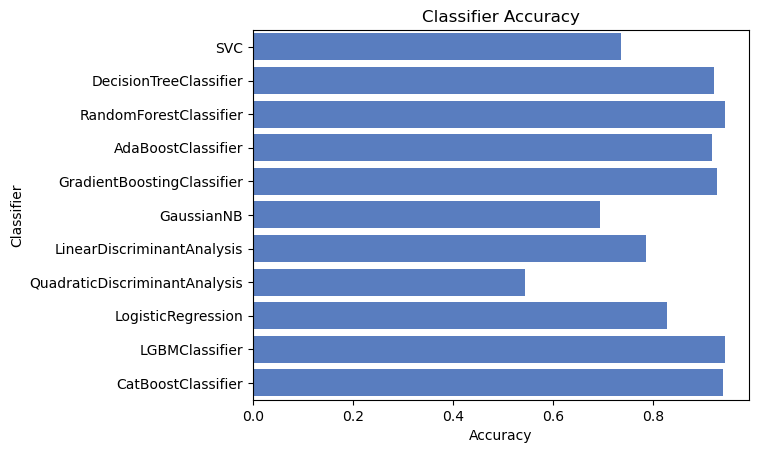

In [154]:
classifiers = [
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    LGBMClassifier(random_state=0),
    CatBoostClassifier(random_state=0, verbose=False)]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [171]:
log.sort_values('Accuracy',ascending=False).sort_values('Accuracy',ascending=False).reset_index(drop=True)

,Classifier,Accuracy
0,RandomForestClassifier,0.945062
1,LGBMClassifier,0.943827
2,CatBoostClassifier,0.941358
3,GradientBoostingClassifier,0.928395
4,DecisionTreeClassifier,0.922222
5,AdaBoostClassifier,0.918210
6,LogisticRegression,0.827469
7,LinearDiscriminantAnalysis,0.786111
8,SVC,0.736420
9,GaussianNB,0.693827


In [172]:
# Classifiers
classifiers = {
    "Dtree" : DecisionTreeClassifier(random_state = 42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42),
    "CatBoost" : CatBoostClassifier(random_state=42, verbose=False),
    "GradientBoost" : GradientBoostingClassifier()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

tree_grid = {'criterion': ['gini', 'entropy'],
            'max_depth': [2, 4, 6, 8, 10, None]}



# Dictionary of all grids
grid = {
    "Dtree" : tree_grid,
    "RandomForest" : RF_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "GradientBoost": boosted_grid
}

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [175]:
import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: Dtree
Training time (mins): 0.08

Model: RandomForest
Training time (mins): 0.16

Model: LGBM
Training time (mins): 0.08

Model: CatBoost
Training time (mins): 3.99

Model: GradientBoost
Training time (mins): 0.66



In [176]:
valid_scores.sort_values('Validation accuracy',ascending=False)

,Classifer,Validation accuracy,Training time
3,CatBoost,0.947450,3.99
2,LGBM,0.942813,0.08
4,GradientBoost,0.936631,0.66
1,RandomForest,0.928903,0.16
0,Dtree,0.904173,0.08


In [177]:
clf_best_params

{'Dtree': {'criterion': 'gini', 'max_depth': 8},
 'RandomForest': {'max_depth': 12, 'n_estimators': 300},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150},
 'CatBoost': {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200},
 'GradientBoost': {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 100}}

In [178]:
# 상위 4개의 ML 모델 생성
RF_clf = RandomForestClassifier(**clf_best_params["RandomForest"],random_state=0)
lgbm_clf = LGBMClassifier(**clf_best_params["LGBM"],random_state=0)
cb_clf = CatBoostClassifier(**clf_best_params["CatBoost"],random_state=0, verbose=False)
gb_clf= GradientBoostingClassifier(**clf_best_params["GradientBoost"],random_state=0)

In [179]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [181]:
RF_train, RF_test = get_stacking_base_datasets(RF_clf, X, y, test, 7)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X, y, test, 7)
cb_train, cb_test = get_stacking_base_datasets(cb_clf, X, y, test, 7)
gb_train, gb_test = get_stacking_base_datasets(gb_clf, X, y, test, 7)

RandomForestClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
CatBoostClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
GradientBoostingClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [182]:
Stack_final_X_train = np.concatenate((RF_train, lgbm_train, cb_train, gb_train), axis=1)
Stack_final_X_test = np.concatenate((RF_test, lgbm_test, cb_test, gb_test), axis=1)
cb_clf.fit(Stack_final_X_train,y)
stack_final = cb_clf.predict(Stack_final_X_test)

In [183]:
submission['label'] = stack_final

In [184]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [185]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [187]:
submission.to_csv('world_submission_5.csv', index = False)

## 모델링 4

In [155]:
lgbm = LGBMClassifier()

In [156]:
lgbm.fit(X, y)

LGBMClassifier()

In [157]:
pred = lgbm.predict(test)

In [158]:
len(pred)

2441

In [159]:
submission['label'] = pred

In [160]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [161]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [162]:
submission.to_csv('world_submission_3.csv', index = False)

## 모델링 5

In [163]:
rf = RandomForestClassifier()

In [164]:
rf.fit(X, y)

RandomForestClassifier()

In [165]:
pred = rf.predict(test)

In [166]:
len(pred)

2441

In [167]:
submission['label'] = pred

In [168]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [169]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [170]:
submission.to_csv('world_submission_4.csv', index = False)

## 모델링 6